# Actividad 6: Cliques y grafos planos
###### Alberto Benavides


## Anexo

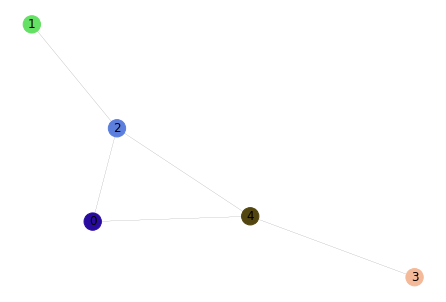

In [198]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint, random
from itertools import combinations, chain


p = 0.8
n = 5

G = nx.Graph()
G.add_nodes_from(range(n))
colors = [(random(), random(), random()) for _i in range(n)]

for i in range(n):
    for j in range (i, n):
        if i != j and random() < p:
            G.add_edge(i, j)

options = {
    'node_size': 300,
    'width': 0.1
}

plt.figure()
# https://stackoverflow.com/a/8083655
nx.draw(G, with_labels=True, node_color=colors, **options)

In [199]:
cliques = set()
# Por cada combinación
for i in G.nodes:
    for j in G[i]:
        nodes = set()
        edges = set()
        nodes.add(i)
        nodes.add(j)
        cliques.add(frozenset(nodes))
        nodes = set()
        edges = set()
        nodes.add(i)
        nodes.add(j)
        for k in G[j]:
            es_vecino = True
            if k in G[i]:
                for l in nodes:
                    if k not in G[l]:
                        es_vecino = False
                if es_vecino:
                    nodes.add(k)
                    cliques.add(frozenset(nodes))

max_cliques = []
ordenados = sorted(cliques, key=len)
# https://stackoverflow.com/a/39930454
ordenados = [set(x) for x in ordenados]
for i in range(len(ordenados)):
    es_max_clique = True
    for j in range(i + 1, len(ordenados)):
        if ordenados[i].issubset(ordenados[j]):
            es_max_clique = False
    print(ordenados[i], ordenados[j], es_max_clique)
    if es_max_clique:
        max_cliques.append(ordenados[i])

{3, 4} {0, 2, 4} True
{1, 2} {0, 2, 4} True
{0, 2} {0, 2, 4} False
{0, 4} {0, 2, 4} False
{2, 4} {0, 2, 4} False
{0, 2, 4} {0, 2, 4} True


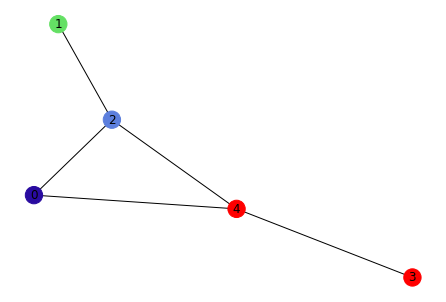

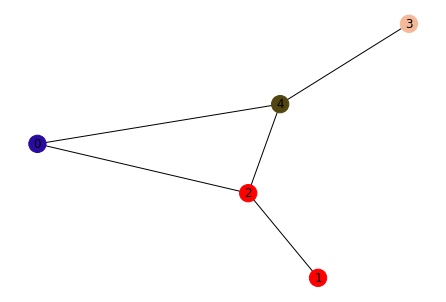

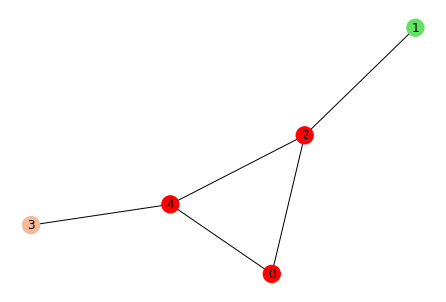

In [200]:
grafos = []
for i in max_cliques:
    C = nx.Graph()
    C.add_nodes_from(i)
    for j, k in combinations(i, 2):
        C.add_edge(j,k)
    grafos.append(C)
    C_colors = []
    for i in G.nodes:
        if i in C.nodes:
            C_colors.append('red')
        else:
            C_colors.append(colors[i])
    # https://stackoverflow.com/a/8083655
    plt.figure()
    nx.draw(G, with_labels=True, node_color=C_colors)